In [1]:
import numpy as np
import pandas as pd
import random as rd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from DatasetLogReturn import StockDatasetLogReturn

In [2]:
configs = {
    # "batch_size" : 128,
    # "max_file_count" : 2179,
    "train_file" : 30, # 12,
    "validation_file" : 0, # 7,
    "test_file" : 10, # 7,
    "input_size" : 1,
    "output_size" : 1,
    # "init_learning_rate" : 1e-2,
    # "scheduler_factor": 0.2,
    # "scheduler_patience": 2,
    # "scheduler_min_lr": 1e-4,
    # "epoch" : 150
}

configs["file_count"] = configs["train_file"] + configs["validation_file"] + configs["test_file"]

print("File count:", configs["file_count"])

File count: 40


In [3]:
tickers = list(map(str.strip,open("tickers.txt","r").readlines()))
removes = ["SEE", "ELA", "VHI"]
tickers = [ e for e in tickers if e not in removes]

# ./data/SEE.csv negative found: 2315
# ./data/ELA.csv negative found: 5915
# ./data/VHI.csv negative found: 5430

# ./data/CVM.csv very high found: 176
# ./data/OBLG.csv very high found: 19
# ./data/CEI.csv very high found: 3057

In [4]:
filenames = ["./data/" + x + ".csv" for x in tickers]
rd.shuffle(filenames)
filenames = filenames[:configs["file_count"]]

train_files, test_files = train_test_split(filenames, test_size=configs["test_file"]/configs["file_count"])

train_dataset = StockDatasetLogReturn(train_files, configs["input_size"], configs["output_size"])
train_dataset.Preprocess()

test_dataset = StockDatasetLogReturn(test_files, configs["input_size"], configs["output_size"])
test_dataset.Preprocess()

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/199773 [00:00<?, ?it/s]

d:\veeliw_offline\stock-machine-learning-project\DatasetLogReturn.py:48: RuntimeWarning: divide by zero encountered in log
  c = np.log(b)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/39321 [00:00<?, ?it/s]

In [5]:
# print(len(filenames))
# print(train_files)
# print(test_files)

In [5]:
select = ["Open", "High", "Low", "Close", "Volume"]

for filename in train_files:
    df = pd.read_csv(f"{filename}")
    df = df[select][:-1]
    cnt = df[df < 0].any(axis=1).sum()
    if cnt > 0:
        print(filename, "negative found:", cnt)

In [6]:
for filename in train_files:
    df = pd.read_csv(f"{filename}")
    cnt = (df["Close"] > 10000).sum()
    if cnt > 0:
        print(filename, "very high found:", cnt)

In [7]:
train_df = pd.concat([pd.read_csv(f"{filename}") for filename in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(f"{filename}") for filename in test_files], ignore_index=True)

In [8]:
select = ["Open", "High", "Low", "Close", "Volume"]
train_df_x = train_df[select][:-1]
train_df_y = train_df["Close"][1:]
test_df_x = test_df[select][:-1]
test_df_y = test_df["Close"][1:]

In [9]:
print("Train Size:", len(train_df_x), len(train_df_y))
print("Test Size:", len(test_df_x), len(test_df_y))

Train Size: 199862 199862
Test Size: 39350 39350


In [10]:
print(train_df_x.isnull().sum(), train_df_y.isnull().sum())
print(test_df_x.isnull().sum(), test_df_y.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 0


In [11]:
# Using log return

train_np_x = np.array([train_dataset[idx][0][1:] for idx in range(len(train_dataset))]).reshape(-1, 5)
train_np_y = np.array([train_dataset[idx][1][4] for idx in range(len(train_dataset))]).reshape(-1)
test_np_x = np.array([test_dataset[idx][0][1:] for idx in range(len(test_dataset))]).reshape(-1, 5)
test_np_y = np.array([test_dataset[idx][1][4] for idx in range(len(test_dataset))]).reshape(-1)

In [12]:
regression = LinearRegression()
regression.fit(train_df_x, train_df_y)

regression_log = LinearRegression()
regression_log.fit(train_np_x, train_np_y)

LinearRegression()

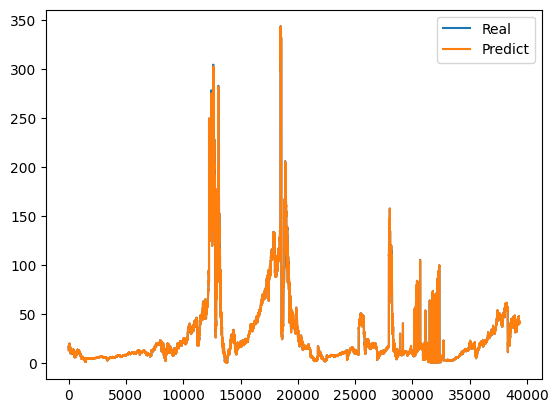

In [13]:
y_pred = regression.predict(test_df_x)
plt.plot(test_df_y, label="Real")
plt.plot(y_pred, label="Predict")

plt.legend()
plt.show()

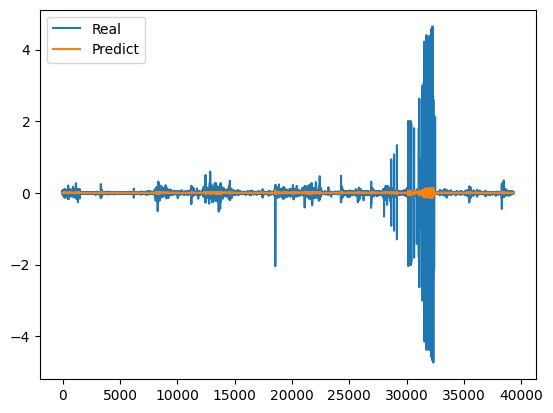

In [16]:
y_pred_log = regression_log.predict(test_np_x)
plt.plot(test_np_y, label="Real")
plt.plot(y_pred_log, label="Predict")

plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [18]:
mae = mean_absolute_error(y_true=test_df_y, y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=test_df_y, y_pred=y_pred) #default=True
rmse = root_mean_squared_error(y_true=test_df_y, y_pred=y_pred)

mae_log = mean_absolute_error(y_true=test_np_y, y_pred=y_pred_log)
#squared True returns MSE value, False returns RMSE value.
mse_log = mean_squared_error(y_true=test_np_y, y_pred=y_pred_log) #default=True
rmse_log = root_mean_squared_error(y_true=test_np_y, y_pred=y_pred_log)

print("Linear Regression")
print("Score:", regression.score(test_df_x, test_df_y))
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

print()
print("Linear Regression with Log Return")
print("Score:", regression_log.score(test_np_x, test_np_y))
print("MAE:", mae_log)
print("MSE:", mse_log)
print("RMSE:", rmse_log)

Linear Regression
Score: 0.9704403609805939
MAE: 1.1670963041588556
MSE: 39.73293978532389
RMSE: 6.303406998229124

Linear Regression with Log Return
Score: 0.02525738283938339
MAE: 0.05226784
MSE: 0.096603185
RMSE: 0.31081054


In [19]:
import joblib
joblib.dump(regression, "./models/LinearRegression.sav")

['./models/LinearRegression.sav']

In [20]:
joblib.dump(regression_log, "./models/LinearRegression_log.sav")

['./models/LinearRegression_log.sav']